# A Star Algorithm

In [1]:
import heapq
from collections import deque

In [2]:
"""
                S
          A             D
      B       D     E      A
    C   E         B   F
                      G

"""

Dic = {
    0: 'S', 1: 'A', 2: 'B', 3: 'C', 4: 'D',
    5: 'E', 6: 'F', 7: 'G'
}

Graph_cost =[
    [0,3,0,0,4,0,0,0],
    [3,0,4,0,5,0,0,0],
    [0,4,0,4,0,5,0,0],
    [0,0,4,0,0,0,0,0],
    [4,5,0,0,0,2,0,0],
    [0,0,5,0,2,0,4,0],
    [0,0,0,0,0,4,0,3.5],
    [0,0,0,0,0,0,3.5,0]

]

Graph_heuristic = {
    'S' : 11.5,
    'A' : 10.1,
    'B' : 9.2,
    'C' : 3.4,
    'D' : 9.2,
    'E' : 7.1,
    'F' : 3.5,
    'G' : 0
}

class Elemento:
    def __init__(self, name, cost, priority):
        self.name = name
        self.cost = cost
        self.priority = priority

    def __lt__(self, other):
        # Comparar por prioridad
        return self.priority < other.priority

    def __repr__(self):
        return f"{self.name}({self.priority})"

In [3]:
def AStar(Graph_cost, Graph_heuristic, Dic, init_node, goal_node):
    visited = set()  # Conjunto para registrar nodos visitados
    heap = []  # Cola de prioridad para explorar nodos

    # Añadir el nodo inicial a la cola: (costo total estimado, costo acumulado, nodo actual, camino hasta ahora)
    heapq.heappush(heap, (Graph_heuristic[init_node], 0, init_node, [init_node]))

    while len(heap) > 0:
        # Extraer el nodo con el menor costo total estimado
        f_cost, g_cost, current_node, path = heapq.heappop(heap)

        # Si alcanzamos el nodo objetivo, devolvemos el camino y el costo
        if current_node == goal_node:
            return path, g_cost

        # Marcar el nodo actual como visitado
        if current_node in visited:
            continue
        visited.add(current_node)

        # Obtener el índice del nodo actual para acceder a la matriz de costos
        current_index = [key for key, value in Dic.items() if value == current_node][0]

        # Explorar los vecinos del nodo actual
        for neighbor_index, cost in enumerate(Graph_cost[current_index]):
            if cost > 0:  # Hay un camino al vecino
                neighbor_node = Dic[neighbor_index]

                # Si el vecino ya fue visitado, lo ignoramos
                if neighbor_node in visited:
                    continue

                # Calcular costos
                new_g_cost = g_cost + cost  # Costo acumulado hasta el vecino
                h_cost = Graph_heuristic[neighbor_node]  # Heurística del vecino
                f_cost = new_g_cost + h_cost  # Costo total estimado

                # Añadir el vecino a la cola
                heapq.heappush(heap, (f_cost, new_g_cost, neighbor_node, path + [neighbor_node]))

    # Si no se encuentra un camino
    return None, float('inf')

In [4]:
init_node = 'S'
goal_node = 'G'
path, cost = AStar(Graph_cost, Graph_heuristic, Dic, init_node, goal_node)
print(f"Camino encontrado: {path}")
print(f"Costo total: {cost}")



Camino encontrado: ['S', 'D', 'E', 'F', 'G']
Costo total: 13.5


Now we are going to solve the 8-puzzle.

In [5]:
def manhattan_distance(state, goal):
    distance = 0
    for i, value in enumerate(state):
        if value == 0:
            continue
        goal_index = goal.index(value)
        distance += abs(i // 3 - goal_index // 3) + abs(i % 3 - goal_index % 3)
    return distance

def get_neighbors(state):
    neighbors = []
    zero_index = state.index(0)
    row, col = divmod(zero_index, 3)

    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # arriba, abajo, izquierda, derecha

    for dr, dc in moves:
        new_row, new_col = row + dr, col + dc
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            new_zero_index = new_row * 3 + new_col
            new_state = list(state)
            new_state[zero_index], new_state[new_zero_index] = new_state[new_zero_index], new_state[zero_index]
            neighbors.append(tuple(new_state))
    return neighbors

def reconstruct_path(came_from, current_state):
    path = []
    while current_state is not None:
        path.append(current_state)
        current_state = came_from.get(current_state)
    return path[::-1]  # Invertir el camino para que vaya de inicio a objetivo

def AStar_8Puzzle(start, goal):
    visited = set()  # Conjunto de estados visitados
    heap = []  # Cola de prioridad
    came_from = {}  # Diccionario para rastrear padres

    heapq.heappush(heap, (manhattan_distance(start, goal), 0, start, None))

    while heap:
        f_cost, g_cost, current_state, parent = heapq.heappop(heap)

        if current_state in visited:
            continue
        visited.add(current_state)

        # Registrar el padre del nodo actual
        came_from[current_state] = parent

        if current_state == goal:
            return reconstruct_path(came_from, current_state), g_cost

        for neighbor in get_neighbors(current_state):
            if neighbor not in visited:
                new_g_cost = g_cost + 1
                new_f_cost = new_g_cost + manhattan_distance(neighbor, goal)
                heapq.heappush(heap, (new_f_cost, new_g_cost, neighbor, current_state))

    return None, float('inf')

# Ejemplo de uso
start = (1, 2, 3, 8, 0, 4, 7, 6, 5)  # Estado inicial
goal = (2, 8, 1, 0, 4, 3, 7, 6, 5)   # Estado objetivo

path, cost = AStar_8Puzzle(start, goal)
print(f"Camino encontrado: {path}")
print(f"Costo total: {cost}")

Camino encontrado: [(1, 2, 3, 8, 0, 4, 7, 6, 5), (1, 0, 3, 8, 2, 4, 7, 6, 5), (0, 1, 3, 8, 2, 4, 7, 6, 5), (8, 1, 3, 0, 2, 4, 7, 6, 5), (8, 1, 3, 2, 0, 4, 7, 6, 5), (8, 1, 3, 2, 4, 0, 7, 6, 5), (8, 1, 0, 2, 4, 3, 7, 6, 5), (8, 0, 1, 2, 4, 3, 7, 6, 5), (0, 8, 1, 2, 4, 3, 7, 6, 5), (2, 8, 1, 0, 4, 3, 7, 6, 5)]
Costo total: 9


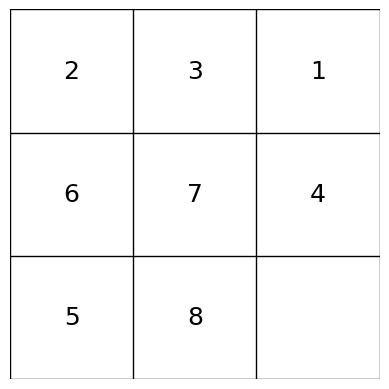

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

def animate_8_puzzle(states, interval=500):
    """
    Genera una animación para visualizar el progreso del juego del 8.

    Args:
        states (list of tuple): Lista de estados por los que pasa el juego.
        interval (int): Tiempo entre fotogramas en milisegundos.
    """
    # Configurar la figura y los ejes
    fig, ax = plt.subplots()
    ax.axis('off')  # Ocultar los ejes

    # Dibujar líneas de la cuadrícula
    for x in range(4):
        ax.axhline(x - 0.5, color='black', linewidth=1)
        ax.axvline(x - 0.5, color='black', linewidth=1)

    # Crear textos iniciales en la cuadrícula
    texts = []
    for i in range(3):
        for j in range(3):
            text = ax.text(j, 2 - i, '', ha='center', va='center', fontsize=18, color='black')
            texts.append(text)

    # Configurar los límites del gráfico
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-0.5, 2.5)
    ax.set_aspect('equal')

    def update(frame):
        """Actualizar los valores en la cuadrícula."""
        grid = np.array(states[frame]).reshape(3, 3)
        for idx, text in enumerate(texts):
            value = grid[idx // 3, idx % 3]
            text.set_text('' if value == 0 else str(value))
        return texts

    # Crear la animación

    anim = FuncAnimation(fig, update, frames=len(states), interval=interval)
    return anim


# Ejemplo de uso
start = (1, 2, 3, 8, 0, 4, 7, 6, 5)  # Estado inicial
goal = (2, 8, 1, 0, 4, 3, 7, 6, 5)   # Estado objetivo

start = (2,3,1,6,7,4,5,8,0)
goal = (1,2,3,4,5,6,7,8,0)

path, cost = AStar_8Puzzle(start, goal)

anim = animate_8_puzzle(path)
anim.save('8_puzzle_animation.gif', writer='pillow')




# Exam

In [ ]:
import heapq

# Graph
graph = {
    'CityA': [('CityB', 5), ('CityD', 3)],
    'CityB': [('CityC', 7), ('CityE', 6)],
    'CityC': [('CityF', 4)],
    'CityD': [('CityE', 8)],
    'CityE': [('CityF', 2)],
    'CityF': []
}

"""
    A* Algorithm
    :param start: Initial node.
    :param goal: Goal node.
    :param heuristic_fn: Heuristic function that estimates the cost from a node to the goal.
    :return: Tuple with the path and the total cost.
"""
def a_star_search(start, goal, heuristic_fn):
    
    # The priority queue stores elements as (f, g, current_node, path)
    queue = [(0 + heuristic_fn(start), 0, start, [])]
    visited = set()

    while queue:
        f, g, node, path = heapq.heappop(queue)

        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        if node == goal:
            return path, g

        for neighbor, cost in graph[node]:
            if neighbor not in visited:
                heapq.heappush(queue, (g + cost + heuristic_fn(neighbor), g + cost, neighbor, path))

    return None, float('inf')  # No path found

# Heuristic function
def heuristic(city):
    """
    Ejemplo de función heurística. Retorna valores estimados desde cada ciudad al objetivo.
    """
    heuristic_values = {
        'CityA': 10,
        'CityB': 8,
        'CityC': 4,
        'CityD': 7,
        'CityE': 2,
        'CityF': 0
    }
    return heuristic_values.get(city, float('inf'))

# Ejecutar búsqueda A*
if __name__ == "__main__":
    start = 'CityA'
    goal = 'CityF'
    path, cost = a_star_search(start, goal, heuristic)
    if path:
        print("Camino encontrado:", path, "Costo:", cost)
    else:
        print("No se encontró un camino")
